### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
print(data.columns)
# Check the data types of the columns
print(data.dtypes)
missing_data = data.isnull().sum()
print("Missing data:\n")
# Print only the columns with missing values
print(missing_data[missing_data > 0])
print()

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')
destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessTh

In [5]:
print("Problematic:\n")
# Check for problematic data (e.g., unique values in each column)
unique_values = data.nunique()
print(unique_values)
print()

Problematic:

destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
car                      5
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Y                        2
dtype: int64



3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:
# Print number of rows and columns
print("Number of rows and columns:")
print(data.shape)

def fix_age_field(data_frame):
    """
    Fixes the 'age' field in the given DataFrame by replacing specific string values
    with numeric values and converting the column to numeric type.

    Parameters:
    data_frame (pandas.DataFrame): The DataFrame containing the 'age' column to be fixed.

    Replacements:
    - '50plus' is replaced with 51
    - 'below21' is replaced with 20

    The 'age' column is then converted to numeric type.

    Returns:
    None: The function modifies the DataFrame in place.
    """
    data_frame['age'] = data_frame['age'].replace('50plus', 51)
    data_frame['age'] = data_frame['age'].replace('below21', 20)
    data_frame['age'] = pd.to_numeric(data_frame['age'])

fix_age_field(data)

import re

def parse_income(row):
    income = row['income']
    if '-' in income:
        # Format: "$75000 - $87499"
        income_min, income_max = map(int, re.findall(r'\d+', income))
    elif 'Less than' in income:
        # Format: "Less than $xxx"
        income_min = 0
        income_max = int(re.findall(r'\d+', income)[0])
    elif 'or More' in income:
        # Format: "$xxx or More"
        income_min = int(re.findall(r'\d+', income)[0])
        income_max = 999999
    else:
        # If format is not recognized, set to None
        assert False, f"Unknown income format: {income}"
        income_min, income_max = None, None
    return pd.Series([income_min, income_max])

# Apply the function to the DataFrame
data[['income_min', 'income_max']] = data.apply(parse_income, axis=1)

# Drop the original 'income' column
data = data.drop(columns=['income'])

# Print row, column count after deciding on missing values
print("Number of rows and columns after deciding on missing values:")
print(data.shape)


Number of rows and columns:
(12684, 28)
Missing income data in new columns:

Number of rows and columns after deciding on missing values:
(12684, 28)


4. What proportion of the total observations chose to accept the coupon?

In [7]:
# proportion of 'Y' == 1  the total number of rows
print("Proportion of drivers accepting coupons in data:")
# print as a percentage with 2 decimal places
print("{:.2f}%".format(data['Y'].mean() * 100))


Proportion of drivers accepting coupons in data:
56.84%


5. Use a bar plot to visualize the `coupon` column.

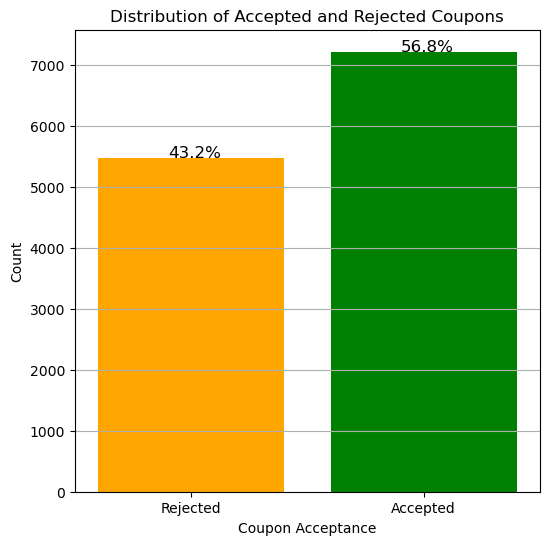

In [8]:
def coupon_bar_plot(data, ax, title):
    """
        Parameters:
        data (DataFrame): The data to be plotted. Must contain a column 'Y' with categorical values.
        ax (matplotlib.axes.Axes): The axes on which to plot the bar chart.
        title (str): The title of the subplot.

        The function performs the following:
        - Plots the count of 'Y' values as a bar chart.
        - Sets the title of the subplot.
        - Sets the x-ticks to show 'Rejected' and 'Accepted'.
        - Colors the bars: 'Rejected' as orange and 'Accepted' as green.
        - Annotates each bar with the percentage of the total count.
        - Sets the y-axis label to 'Count'.
        - Sets the x-axis label to 'Coupon Acceptance'.
        - Adds grid lines to the y-axis.
        
    Plots a bar chart on the given axes with the provided data and title.
    Factor this code for common use in the notebook.
    """
    # Plot the count of 'Y' values
    sns.countplot(x='Y', data=data, ax=ax)
    # Set the title of the subplot
    ax.set_title(title)
    # Set the x-ticks to show 'Rejected' and 'Accepted'
    ax.set_xticks(np.arange(2))
    ax.set_xticklabels(['Rejected', 'Accepted'])
    # Set bar colors: 'Rejected' as orange and 'Accepted' as green
    ax.patches[0].set_facecolor('orange')
    ax.patches[1].set_facecolor('green')
    # Get the total number of data points
    total = len(data)
    # Annotate each bar with the percentage
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.1
        y = p.get_height()
        ax.annotate(percentage, (x, y), size=12)
    # Set the y-axis label
    ax.set_ylabel('Count')
    # Set the x-axis label
    ax.set_xlabel('Coupon Acceptance')
    # Add grid lines to the y-axis
    ax.grid(axis='y')


# use seaborn to plot the distribution of 'Y'
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
coupon_bar_plot(data, ax, 'Distribution of Accepted and Rejected Coupons')


6. Use a histogram to visualize the temperature column.

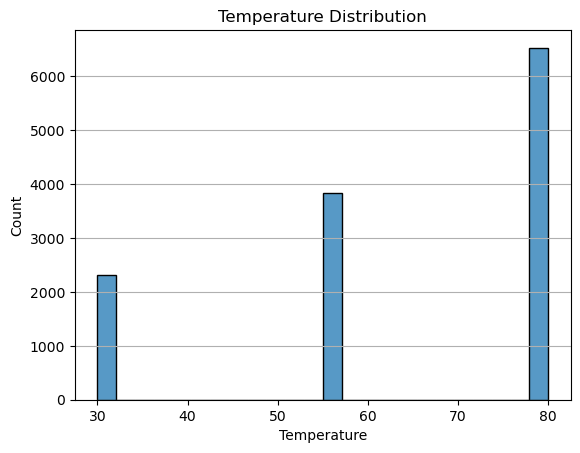

In [9]:
# plot histogram of the temperature columns using seaborn
sns.histplot(data['temperature'])
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [10]:
# create a new dataframe that filter coupon == "Bar"
bar_data = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


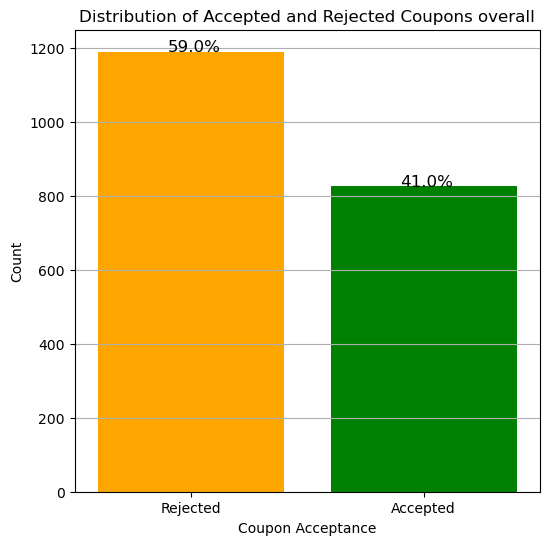

In [11]:
# use seaborn to plot the distribution of 'Y'

# Create 1 row 1 column subplot
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
coupon_bar_plot(bar_data, ax, 'Distribution of Accepted and Rejected Coupons overall')


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [12]:
# Filter out rows with unexpected values in the 'Bar' column
expected_values = ['less1', '1~3', '4~8', 'gt8']
bar_data = bar_data[bar_data['Bar'].isin(expected_values)]

# Get bar_data rows where the values in 'Bar' column are in ['less1', '1~3']
bar_data_fewer_3 = bar_data[bar_data['Bar'].isin(['less1', '1~3'])]

# Get bar_data rows where the values in 'Bar' column are in ['4~8', 'gt8']
bar_data_more_3 = bar_data[bar_data['Bar'].isin(['4~8', 'gt8'])]

# Assert that the sum of the number of rows in bar_data_fewer_3 and bar_data_more_3 equals the number of rows in bar_data
assert (len(bar_data_fewer_3) + len(bar_data_more_3)) == len(bar_data)


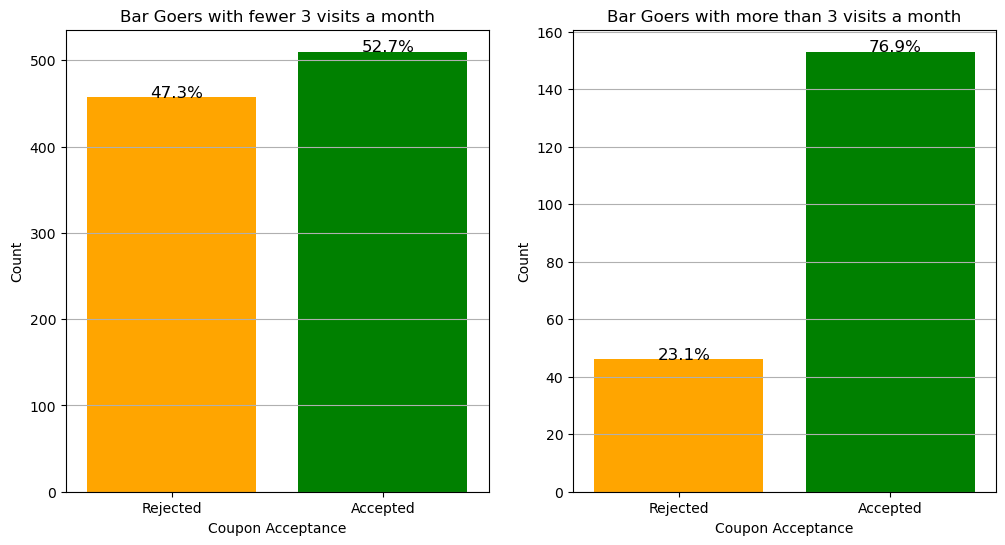

In [13]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot bar data for fewer than 3 bar visits
coupon_bar_plot(bar_data_fewer_3, ax[0], 'Bar Goers with fewer 3 visits a month')
# Plot bar data for 3 or more bar visits
coupon_bar_plot(bar_data_more_3, ax[1], 'Bar Goers with more than 3 visits a month')



4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


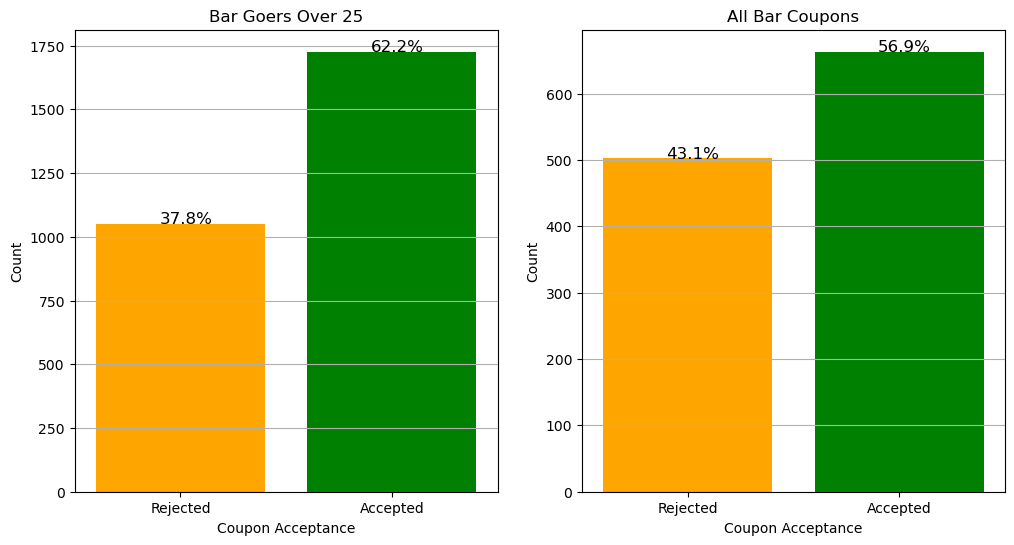

In [14]:
# Filter for 'Bar' in ['1~3', 'gt8', '4~8'] and 'age' > 25
bar_goer_over_25 = data[data['Bar'].isin(['1~3', '4~8', 'gt8']) & 
                        (data['age'] > 25)]

# Create subplots to compare bar goers over 25 and all bar coupons
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
coupon_bar_plot(bar_goer_over_25, ax[0], 'Bar Goers Over 25')
coupon_bar_plot(bar_data, ax[1], 'All Bar Coupons')



5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


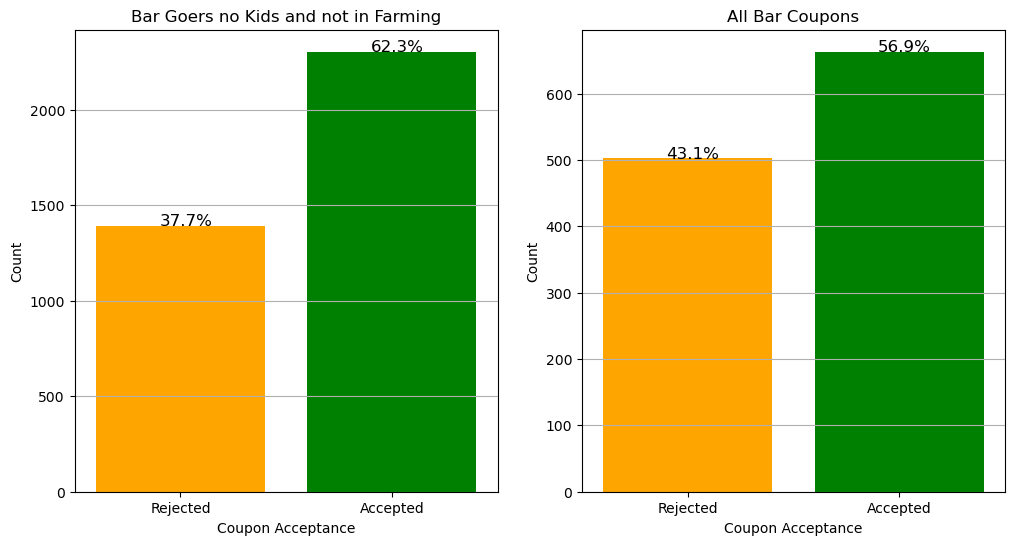

In [15]:
# Filter for 'Bar' in ['1~3', 'gt8', '4~8'], 'passanger' != 'Kid(s)',
# and 'occupation' not in ['farming', 'fishing', 'forestry']
bar_goer_nokids_notfarming = data[
    data['Bar'].isin(['1~3', '4~8', 'gt8']) & 
    (data['passanger'] != 'Kid(s)') & 
    ~data['occupation'].isin(['farming', 'fishing', 'forestry'])
]

# Create subplots to compare bar goers with no kids and not in farming to all bar coupons
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot bar data for bar goers with no kids and not in farming
coupon_bar_plot(bar_goer_nokids_notfarming, ax[0], 'Bar Goers no Kids and not in Farming')

# Plot bar data for all bar coupons
coupon_bar_plot(bar_data, ax[1], 'All Bar Coupons')

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



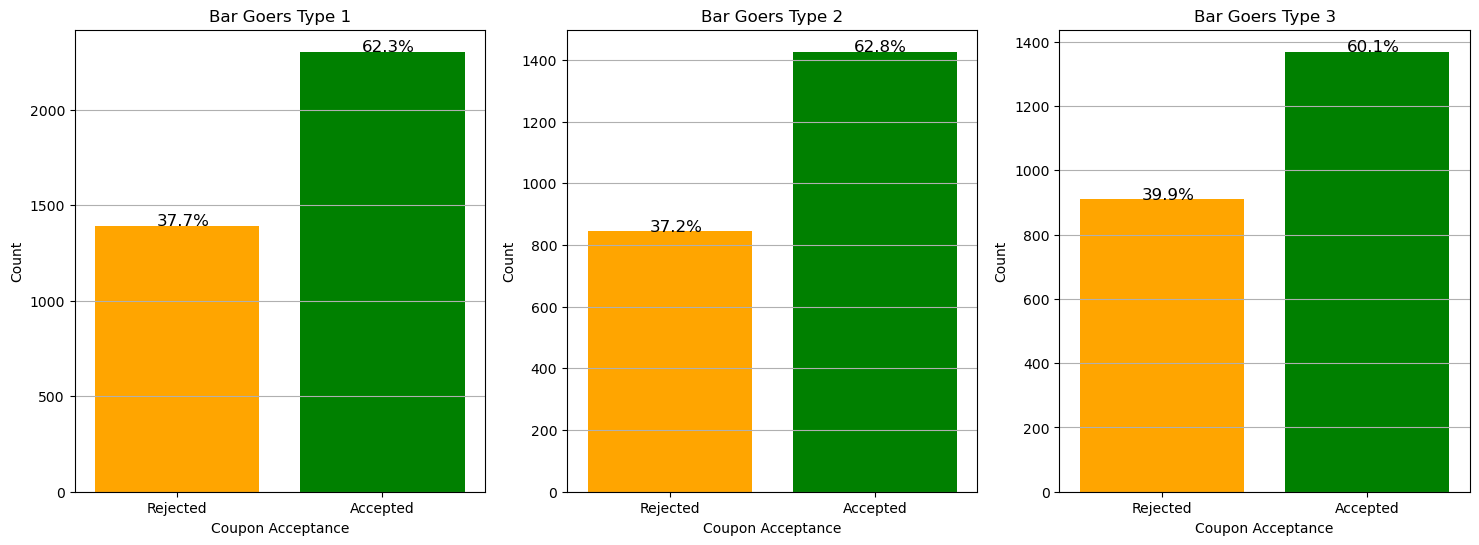

In [17]:
# Create 3 subplots side by side
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Filter data for bar goers who go to bars more than once a month, 
# had passengers that were not a kid, and were not widowed
bar_goer_type1 = data[data['Bar'].isin(['1~3', '4~8', 'gt8']) &
                      (data['passanger'] != 'Kid(s)') &
                      (data['maritalStatus'] != "Widowed")]

# Filter data for bar goers who go to bars more than once a month 
# and are under the age of 30
bar_goer_type2 = data[data['Bar'].isin(['1~3', '4~8', 'gt8']) &
                      (data['age'] < 30)]

# Filter data for those who go to cheap restaurants more than 
# 4 times a month and income is less than 50K
bar_goer_type3 = data[data['RestaurantLessThan20'].isin(['4~8', 'gt8']) & 
                      (data['income_min'] < 50000)]

# Plot bar data for each type of bar goer
coupon_bar_plot(bar_goer_type1, ax[0], 'Bar Goers Type 1')
coupon_bar_plot(bar_goer_type2, ax[1], 'Bar Goers Type 2')
coupon_bar_plot(bar_goer_type3, ax[2], 'Bar Goers Type 3')


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
SUMMARY ="""
Based on the data, it appears that frequent bar-goers (more than three times a month) are more likely to accept bar coupons.
Acceptance rates are higher among those over 25 and those with occupations other than farming, fishing, or forestry.
Other significant factors include having passengers who are not children and visiting cheap restaurants frequently.
Overall, bar coupon acceptance seems influenced by age, occupation, frequency of bar visits, and social context.
Frequent bar-goers, especially those under 30 and non-widowed, show higher acceptance rates, suggesting targeted 
marketing towards these segments could be effective.
"""

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  